In [4]:
import h5py
import pandas as pd
import numpy as np
import os
import pylab as pl

In [5]:
%matplotlib notebook

In [46]:
# experiment = 'JB999_220703_182337'
#experiment = 'JB999_220705_141018' #135834'
experiment = 'JB999_220705_170459' #13583'
ext='h5'
fn1 = '/home/julianarhee/Videos/basler-pq/%s/left_top_metadata.%s' % (experiment, ext)
fn2 = '/home/julianarhee/Videos/basler-pq/%s/right_top_metadata.%s' % (experiment, ext)

In [47]:
if ext == 'csv':
    df1 = pd.read_csv(fn1, sep=',')
    df2 = pd.read_csv(fn2, sep=',')
    df1.shape, df2.shape

## hdf5

In [48]:
# metadata = (framecount, timestamp, arrival_time, sestime, cputime)
# (framecount, timestamp, sestime, cputime)

In [49]:
varnames = 'sestime' #'serial' #['sestime', 'serial']
#df1 = pd.read_hdf(fn2) #, columns=varnames)
df1 = pd.DataFrame(np.array(h5py.File(fn1)[varnames]))

df1

,0
0,7.100064
1,7.199709
2,7.296780
3,7.394969
4,7.496295
...,...
79,15.004922
80,15.103503
81,15.203479
82,15.304551


In [50]:
df2 = pd.DataFrame(np.array(h5py.File(fn2)[varnames]))
df2

,0
0,7.101221
1,7.200668
2,7.297914
3,7.396765
4,7.494827
...,...
79,15.003062
80,15.104411
81,15.205939
82,15.303943


In [35]:
df2[0].diff().dropna().values.min(), df2[0].diff().dropna().values.max()

(0.0925350690013147, 0.1076310079988616)

In [36]:
1/20.

0.05

In [37]:
df1[0].diff().dropna().values.min(), df1[0].diff().dropna().values.max()

(0.09527850000085891, 0.10317913100152509)

In [38]:
diffs = df2.values - df1.values

<IPython.core.display.Javascript object>


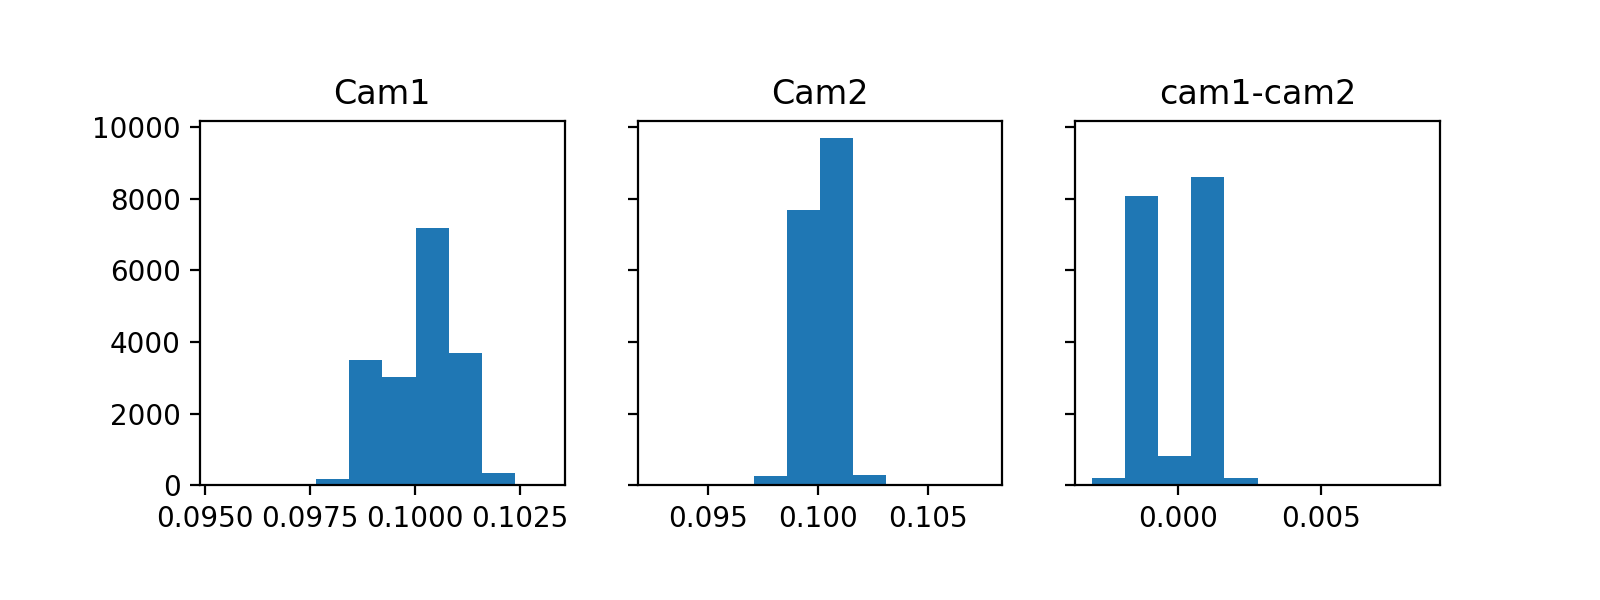

In [45]:
fig, axes =pl.subplots(1,3, figsize=(8,3), sharex=False, sharey=True)
ax=axes[0]; ax.set_title('Cam1')
ax.hist(df1[0].diff().dropna().values)
ax=axes[1]; ax.set_title('Cam2')
ax.hist(df2[0].diff().dropna().values)
ax=axes[2]; ax.set_title('cam1-cam2')
ax.hist(diffs)
for ax in axes:
    ax.set_box_aspect(1)


# Video

In [57]:
import cv2
import time
from IPython import display


In [58]:
vext='mp4'
vpath1 = '%s.%s' % (fn1.split('_metadata')[0], vext)
vpath2 = '%s.%s' % (fn2.split('_metadata')[0], vext)

print(vpath1)
print(vpath2)

/home/julianarhee/Videos/basler-pq/JB999_220705_144136/left_top.mp4
/home/julianarhee/Videos/basler-pq/JB999_220705_144136/right_top.mp4


In [59]:
def load_frames(fn):
    frames = []
    video = cv2.VideoCapture(fn)
    while True:
        read, frame= video.read()
        if not read:
            break
        frames.append(frame[:,:,0])
    frames = np.array(frames)
    return frames


In [60]:

def plot_frames(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            #y = np.random.random(size=(100,1))
            ax.imshow(color)
            #ax.plot(x, y, color)
    fig.canvas.draw()

In [61]:
v1 = load_frames(vpath1)
v2 = load_frames(vpath2)
print("%s: %i frames" % (vpath1, len(v1)))
print("%s: %i frames" % (vpath2, len(v2)))

/home/julianarhee/Videos/basler-pq/JB999_220705_144136/left_top.mp4: 5944 frames
/home/julianarhee/Videos/basler-pq/JB999_220705_144136/right_top.mp4: 5944 frames


In [62]:
print(v1.size, v1.shape)

print(v2.size, v2.shape)

13694976000 (5944, 1200, 1920)
13694976000 (5944, 1200, 1920)


In [64]:
v1.dtype, v2.dtype

(dtype('uint8'), dtype('uint8'))

<IPython.core.display.Javascript object>


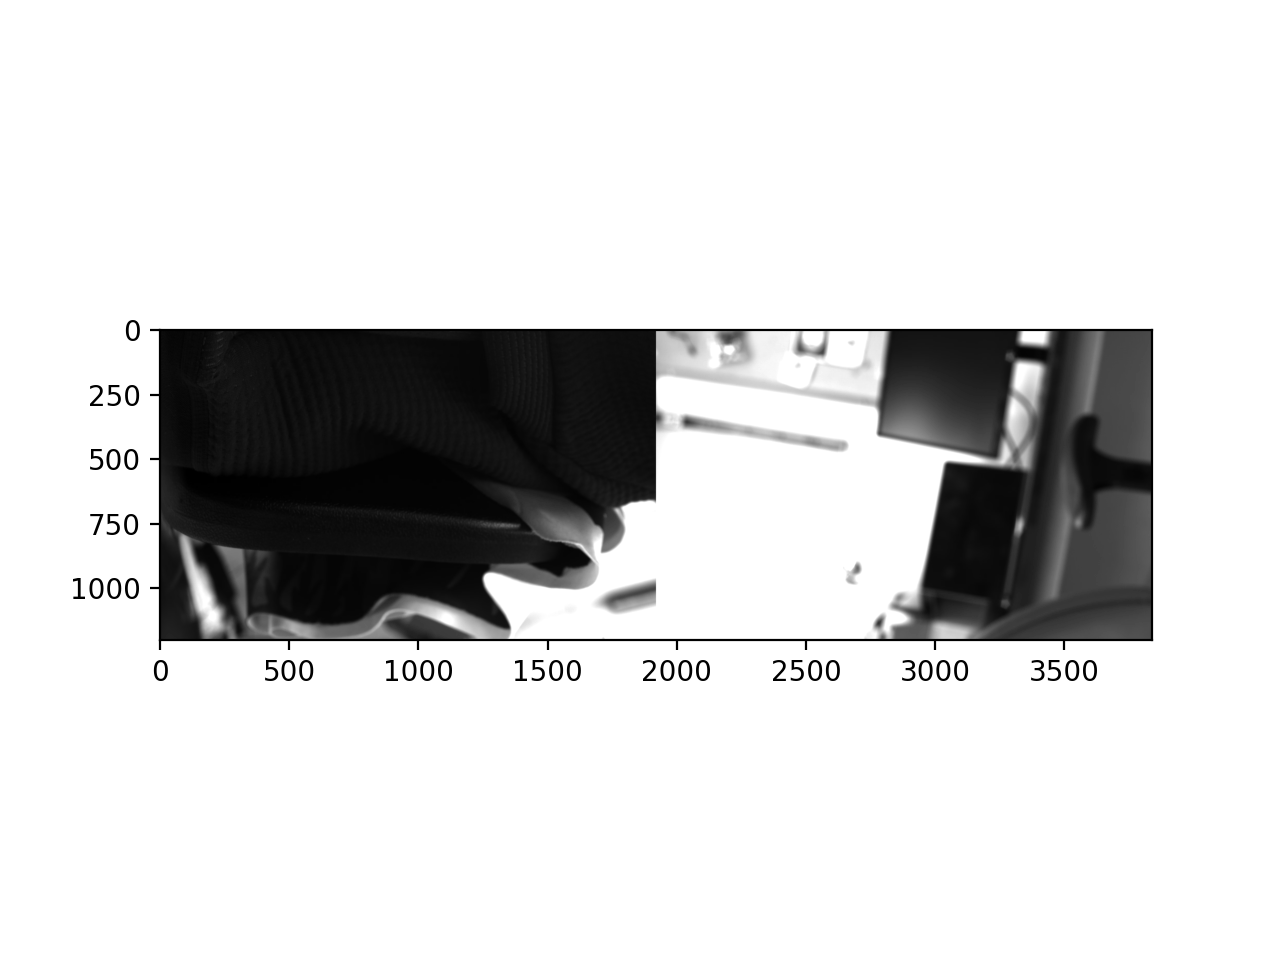

In [65]:
ix = 0
img = np.hstack((v1[ix,:,:], v2[ix,:,:]))
pl.figure()
pl.imshow(img, cmap='gray')

In [ ]:
fig, axes = pl.subplots(1,2)
#ix = -1
for ix in range(100):
    axes[0].imshow(v1[ix])
    axes[1].imshow(v2[ix])
    axes[0].set_title('frame %i' % ix)
#     pl.show()
#     time.sleep(1)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)
    

In [ ]:
fig,axes = pl.subplots(1,2)
for f in range(5):
    plot_frames(ax, ['b', 'r'])
    time.sleep(1)

In [26]:
v1.shape

(250, 1200, 1920, 3)